# Model Loading and Predicting
by Prince Joseph Erneszer Javier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Loading Data

In [3]:
X_test = pd.read_csv("data/processed/X_test_5001.csv")
y_test = pd.read_csv("data/processed/y_test_5001.csv")

In [4]:
X_test.head()

,Accuracy_amin,Accuracy_amax,Accuracy_ptp,Accuracy_mean,Accuracy_std,Accuracy_skew,Accuracy_kurtosis,Bearing_amin,Bearing_amax,Bearing_ptp,...,gyro_z_skew,gyro_z_kurtosis,Speed_amin,Speed_amax,Speed_ptp,Speed_mean,Speed_std,Speed_skew,Speed_kurtosis,trip_len
0,3.0,8.391,5.391,4.004431,0.970454,2.496676,6.776681,0.00000,355.000000,355.000000,...,1.570197,10.039042,0.00,21.364538,21.364538,8.715181,6.471265,0.216391,-1.230089,809.0
1,3.0,38.592,35.592,4.269997,2.767686,7.991289,74.241857,0.00000,359.000000,359.000000,...,2.759855,39.543976,-1.00,25.840000,26.840000,10.815727,8.694203,0.115695,-1.524800,798.0
2,10.0,30.000,20.000,10.028540,0.691596,27.184667,768.119159,11.47489,358.719421,347.244532,...,0.037153,4.397883,0.16,18.570000,18.410000,7.060845,5.213331,0.530168,-1.078048,911.0
3,3.0,8.000,5.000,3.656092,0.758157,1.950838,5.168846,38.00000,308.000000,270.000000,...,-0.476902,8.352040,0.00,20.890152,20.890152,6.778761,6.859656,0.510766,-1.189454,837.0
4,3.0,12.000,9.000,3.565319,0.876595,3.046777,16.636378,52.00000,276.000000,224.000000,...,-1.068978,10.420801,0.00,23.797161,23.797161,4.467340,6.733916,1.198001,-0.018637,1256.0


In [5]:
y_test.head()

,label
0,0
1,0
2,1
3,0
4,1


In [6]:
X_test.shape, y_test.shape

((2501, 64), (2501, 1))

## Data Preprocessing

### Feature Engineering

### Scaling

## Model Predicting

In [6]:
# load the model from disk
filename = "models/gbm.sav"
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [7]:
result

0.5884

In [8]:
y_pred = loaded_model.predict(X_test)


Confusion Matrix Using Best Parameters


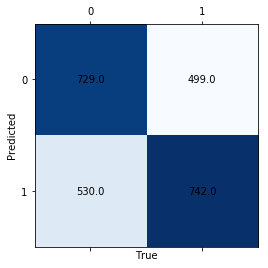

(array([0.        , 0.40635179, 1.        ]),
 array([0.        , 0.58333333, 1.        ]),
 array([2, 1, 0]))

In [9]:
# Confusion Matrix
print()
print("Confusion Matrix Using Best Parameters")
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# ROC Curve
# How to interpret this?
roc_curve(y_test, y_pred)

In [ ]:
# Precision, Recall

In [ ]:
# ROC Curve